<a href="https://colab.research.google.com/github/Kaliruo/Abeilles/blob/main/Abeilles/Notebook/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 37.0 MB/s 
     |████████████████████████████████| 15.8 MB 47.4 MB/s 
     |████████████████████████████████| 76 kB 5.8 MB/s 
     |████████████████████████████████| 802 kB 36.9 MB/s 
     |████████████████████████████████| 132 kB 48.8 MB/s 
     |████████████████████████████████| 793 kB 45.4 MB/s 
     |████████████████████████████████| 793 kB 50.2 MB/s 
     |████████████████████████████████| 791 kB 44.1 MB/s 
     |████████████████████████████████| 786 kB 67.2 MB/s 
     |████████████████████████████████| 779 kB 42.0 MB/s 
     |████████████████████████████████| 778 kB 42.8 MB/s 
     |████████████████████████████████| 776 kB 72.0 MB/s 
     |████████████████████████████████| 769 kB 54.2 MB/s 
     |████████████████████████████████| 766 kB 79.5 MB/s 
     |████████████████████████████████| 1.0 MB 38.9 MB/s 
     |████████████████████████████████| 722 kB 53.8 MB/s 
     |███████████

In [3]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# librairies générales
import pickle 
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys
import copy


# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.graph_objs as go
import plotly.offline as py

from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# TensorFlow et keras
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from tqdm import tqdm
from keras.models import load_model
from keras.datasets import mnist


# Umap 
import umap.plot

In [4]:
def plot_curves_confusion (history,confusion_matrix,class_names):
  plt.figure(1,figsize=(16,6))
  plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1,
                          top = 0.9, wspace = 0.25, hspace = 0)

  # division de la fenêtre graphique en 1 ligne, 3 colonnes,
  # graphique en position 1 - loss fonction

  plt.subplot(1,3,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Training loss', 'Validation loss'], loc='upper left')
  # graphique en position 2 - accuracy
  plt.subplot(1,3,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
  
  # matrice de correlation
  plt.subplot(1,3,3)
  sns.heatmap(conf,annot=True,fmt="d",cmap='Blues',xticklabels=class_names, yticklabels=class_names)# label=class_names)
  # labels, title and ticks
  plt.xlabel('Predicted', fontsize=12)
  #plt.set_label_position('top') 
  #plt.set_ticklabels(class_names, fontsize = 8)
  #plt.tick_top()
  plt.title("Correlation matrix")
  plt.ylabel('True', fontsize=12)
  #plt.set_ticklabels(class_names, fontsize = 8)
  plt.show()

In [5]:
# pour monter son drive Google Drive local
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import sys
my_local_drive='/content/gdrive/My Drive/Colab Notebooks/'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd


/content/gdrive/My Drive/Colab Notebooks


'/content/gdrive/My Drive/Colab Notebooks'

In [7]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Nombre d'exemples du jeu d'apprentissage :  60000
Format du jeu d'apprentissage :  (60000, 28, 28)
Format des labels pour le jeu d'apprentissage' :  (60000,) 

Nombre d'exemples du jeu de test :  10000
Nombre de features du jeu de test :  28
Format des labels pour le jeu de test :  (10000,) 

Exemple de labels 5 

Distribution des labels dans le jeu d'apprentissage


Text(0.5, 1.0, "Nombre d'éléments par classe")

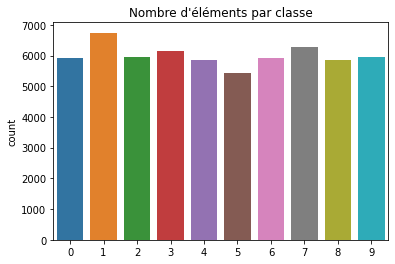

In [8]:
print("Nombre d'exemples du jeu d'apprentissage : ", train_images.shape[0])
print ("Format du jeu d'apprentissage : ", train_images.shape)
print("Format des labels pour le jeu d'apprentissage' : ", train_labels.shape, '\n')
print("Nombre d'exemples du jeu de test : ", test_images.shape[0])
print ("Nombre de features du jeu de test : ", test_images.shape[1])
print("Format des labels pour le jeu de test : ", test_labels.shape, '\n')
print ("Exemple de labels",train_labels[0], '\n')
print ("Distribution des labels dans le jeu d'apprentissage")
sns.countplot(np.array(train_labels))
plt.title("Nombre d'éléments par classe")

In [9]:
print("Création d'une classe pour pouvoir labéliser les images lors de l'affichage")
class_names = ["0","1","2","3","4","5","6","7","8","9"]

Création d'une classe pour pouvoir labéliser les images lors de l'affichage


taille de train labels 60000
taille de class name 10


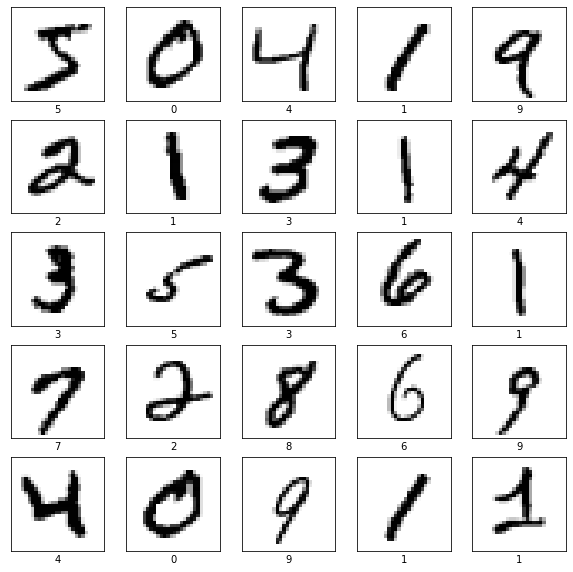

In [10]:
plt.figure(figsize=(10,10))
columns = 25
print("taille de train labels",len(train_labels))
print("taille de class name",len(class_names))

for i in range(columns):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [87]:
#nb_images_ftest = 3000 :nb_images_ftest
print("Formes de jeu données à visualiser", train_images.shape)
train_images_reshaped = train_images.reshape((train_images.shape[0],28*28))
print("Formes de jeu de données à visualiser après reshape",train_images_reshaped.shape) 

x_plot = train_images_reshaped[:nb_images_ftest]
y_plot = train_labels[:nb_images_ftest]

label_dictionnary = {
    0 : "0",
    1 : "1",
    2 : "2",
    3 : "3",
    4 : "4",
    5 : "5",
    6 : "6",
    7 : "7",
    8 : "8",
    9 : "9",
}

def true_label(x):
  return label_dictionnary[x]

Target_names=[]
for i in range(0,nb_images_ftest):
 Target_names=np.append(Target_names,true_label(y_plot[i]))

Formes de jeu données à visualiser (60000, 28, 28)
Formes de jeu de données à visualiser après reshape (60000, 784)


#Visualisation des données avec T-NSE

In [33]:
# Utilisation de TSNE
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(x_plot)
traceTSNE = go.Scatter(
    x = tsne_results[:,0],
    y = tsne_results[:,1],
    text = Target_names,
    mode = 'markers',
    showlegend = True,
    marker = dict(
        size = 8,
        color = y_plot,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
            ),
        opacity = 0.8
    )
)
data = [traceTSNE]
layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= False,
              )
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

#Pré-traitement des donnés pour le réseaux

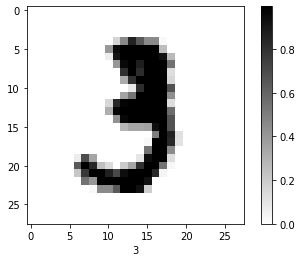

In [34]:
#Visualisation d'une image pour le pré-traitement :
image_vis=10
plt.figure()
plt.imshow(train_images[image_vis], cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[train_labels[image_vis]])
plt.show()


#Normalisation des données 

In [35]:
train_images_original  =copy.deepcopy(train_images)
test_images_original = copy.deepcopy(test_images)

train_images = train_images / 255.0
test_images = test_images / 255.0

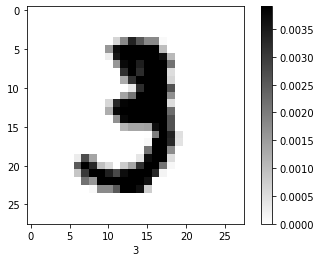

In [36]:
image_vis=10
plt.figure()
plt.imshow(train_images[image_vis], cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[train_labels[image_vis]])
plt.show()

In [89]:
seed=7
nb_splits = 10
k_fold = KFold(n_splits = nb_splits, shuffle = True, random_state = seed)
pipe = Pipeline([('pca',PCA(n_components=95)),
                 ('clf',GaussianNB())])
scoring = 'accuracy'

train_image_reshaped = train_images.reshape((train_images.shape[0], 28*28))
print("Evluation de ", pipe["clf"], " sur ", nb_splits, "splits")
score = cross_val_score(pipe, train_images_reshaped, train_labels, cv=k_fold, scoring=scoring)
print('Les différentes accuracy pour les ',nb_splits, 'évaluations sont : \n',
      score,'\n')
print('Accurancy moyenne : %0.3f'%(score.mean()),
      ' strandard deviation %0.3f'%(score.std()))

#prediction sur les données de test
# attention ne pas oublier de faire un pipe.fit pour créer le modèle final
pipe.fit(train_images_reshaped, train_labels)
# transformation des données de test en vecteur au lieu de matrice
test_images_reshaped=test_images.reshape((test_images.shape[0], 28* 28))
y_predicted = pipe.predict(test_images_reshaped)
print("Accuracy sur le jeu de test", accuracy_score(test_labels, y_predicted))

Evluation de  GaussianNB()  sur  10 splits
Les différentes accuracy pour les  10 évaluations sont : 
 [0.86266667 0.87316667 0.86116667 0.86933333 0.8685     0.86983333
 0.86966667 0.87633333 0.87316667 0.8735    ] 

Accurancy moyenne : 0.870  strandard deviation 0.005
Accuracy sur le jeu de test 0.8777


#Test avec le classifieur 'traditionnel'

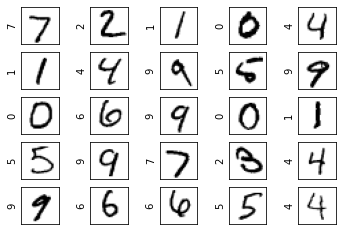

In [120]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.ylabel(y_predicted[i])

#Avec un réseau de neurones

In [96]:
model1 = models.Sequential()
model1.add(layers.Flatten(input_shape=(28, 28)))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

In [98]:
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [99]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [100]:
epochs=8
batch_size=64
history=model1.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=epochs, batch_size=batch_size) 


Epoch 1/8
938/938 [==============================] - 4s 3ms/step - loss: 1.4264 - accuracy: 0.6830 - val_loss: 0.7530 - val_accuracy: 0.8334
Epoch 2/8
938/938 [==============================] - 3s 3ms/step - loss: 0.5942 - accuracy: 0.8552 - val_loss: 0.4709 - val_accuracy: 0.8813
Epoch 3/8
938/938 [==============================] - 3s 3ms/step - loss: 0.4347 - accuracy: 0.8849 - val_loss: 0.3884 - val_accuracy: 0.8977
Epoch 4/8
938/938 [==============================] - 3s 3ms/step - loss: 0.3745 - accuracy: 0.8971 - val_loss: 0.3448 - val_accuracy: 0.9063
Epoch 5/8
938/938 [==============================] - 3s 3ms/step - loss: 0.3428 - accuracy: 0.9032 - val_loss: 0.3219 - val_accuracy: 0.9100
Epoch 6/8
938/938 [==============================] - 3s 3ms/step - loss: 0.3223 - accuracy: 0.9083 - val_loss: 0.3055 - val_accuracy: 0.9119
Epoch 7/8
938/938 [==============================] - 3s 3ms/step - loss: 0.3074 - accuracy: 0.9118 - val_loss: 0.2917 - val_accuracy: 0.9154
Epoch 8/8
938

In [123]:
predict_y1=model1.predict(test_images) 
y_pred=np.argmax(predict_y,axis=1)

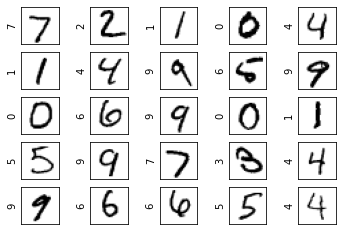

In [125]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.ylabel(y_pred[i])

#Réseau de neurones avec le modèle de convulution

In [126]:
train_images = train_images_original.reshape(60000, 28, 28, 1)
test_images = test_images_original.reshape(10000, 28, 28, 1)

In [127]:
cnnmodel = tf.keras.Sequential()
# 1 couche de convolution, avec nombre de filtres progressif 32
cnnmodel.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2, 2)))
# remise à plat
cnnmodel.add(Flatten())
# Couche dense classique ANN
cnnmodel.add(Dense(100, activation='relu'))
# Couche de sortie (classes de 0 à 9)
cnnmodel.add(Dense(10, activation='softmax'))


In [128]:
print (cnnmodel.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [129]:
cnnmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

epochs=4
batch_size=64
history=cnnmodel.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=epochs, batch_size=batch_size) 
                  

Epoch 1/4
938/938 [==============================] - 27s 28ms/step - loss: 0.1923 - accuracy: 0.9433 - val_loss: 0.0868 - val_accuracy: 0.9731
Epoch 2/4
938/938 [==============================] - 26s 28ms/step - loss: 0.0649 - accuracy: 0.9806 - val_loss: 0.0563 - val_accuracy: 0.9819
Epoch 3/4
938/938 [==============================] - 26s 28ms/step - loss: 0.0432 - accuracy: 0.9868 - val_loss: 0.0548 - val_accuracy: 0.9817
Epoch 4/4
938/938 [==============================] - 26s 28ms/step - loss: 0.0312 - accuracy: 0.9902 - val_loss: 0.0402 - val_accuracy: 0.9856


In [130]:
predict_y3=cnnmodel.predict(test_images) 
y_pred3=np.argmax(predict_y3,axis=1)

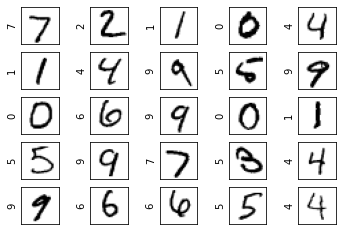

In [133]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images_original[i],cmap=plt.cm.binary)
    plt.ylabel(y_pred3[i])